# Topics coveres
1. Filters & Edge Detection In Computer Vision
2. Line, Rectangle
3. Lane detection in Opencv
4. CNN-Image Classification --Multiclass classification using CNN

# 1. Filters & Edge Detection In Computer Vision

### Blur the Image/Low pass filter/smooth the Images

## Goal- Blur the image various low pass filters --2D convolution

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

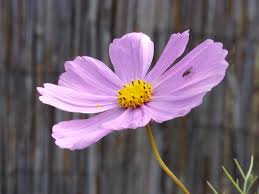

In [2]:
# load the image

img = cv2.imread('/content/drive/MyDrive/Computer Vision/flower.jfif')
cv2_imshow(img)

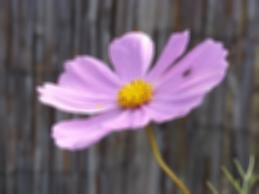

In [3]:
# kernel matrix 5*5, all elements are one
Kernel=np.ones((5,5),np.float32)/25
blur_image=cv2.filter2D(img,-1,Kernel)
cv2_imshow(blur_image )


In [4]:
image= np.array([[10,20,30,40,50],
                [60,70,80,90,100],
                [110,120,130,140,150],
                [160,170,180,190,200],
                [220,220,230,240,250]
                ],dtype='uint8')

In [5]:
# apply the average filter using a 3x3 kernel
kernel_size = (3,3)
average_filter = cv2.blur(image, kernel_size)
print ('Original image:')
print(image)
print("\nAverage Filtered image:")
print(average_filter)

Original image:
[[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]
 [160 170 180 190 200]
 [220 220 230 240 250]]

Average Filtered image:
[[ 50  53  63  73  77]
 [ 67  70  80  90  93]
 [117 120 130 140 143]
 [168 171 180 190 193]
 [184 188 197 207 210]]


Reduce the effect of high frequency pixels by averaging the neighbour pixels, this filter will replace the pixels by the average of their neighbour pixels.



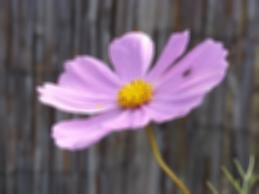

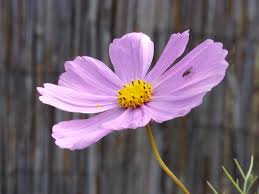

In [6]:

blur_img1=cv2.blur(img,(5,5))
cv2_imshow(blur_img1)
cv2_imshow(img)

## We can use filter2D or blur function but filter will give us more control over the image.

# Gaussian filter

In this type of filter we reduce the noise, we smooth out the data. Using a gaussian function where x and y are the coordinates of a pixel, where sigma is the standard deviation of the gaussian filter.  

**We need to:**
* 1º Create a Gaussian kernel using the Gaussian function
* 2º Normalize the kernel (sum of all elements equal to one)
* 3º Apply the convolution operation with the image  and slide the kernel over the image

<b><u>In the next image is represented the Gaussian function:</u></b>

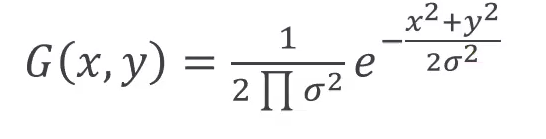

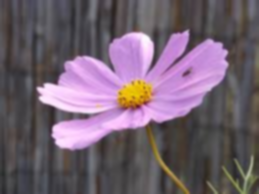

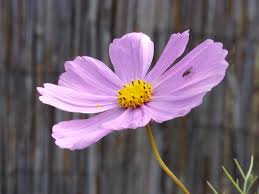

In [7]:
# apply Gaussian Filter
gaussian_filter = cv2.GaussianBlur(img, (5,5),0) # zero is the standard deviation in the x direction
cv2_imshow(gaussian_filter)
cv2_imshow(img)

# Median blur- the median of all pixels under the kernel area, central element is replaced with the median value.~

Median blur preserves the edges, reduce the noise it doesn't smooth the image

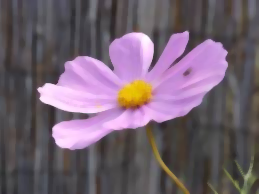

In [8]:
median_blur=cv2.medianBlur(img,5)
cv2_imshow(median_blur)

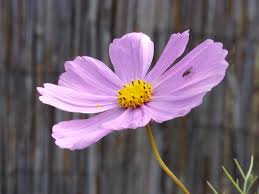

In [9]:
cv2_imshow(img)

# Bilateral Filter- highly effective in noise removal, keeping the edges sharp.

Applys Gaussian filter and Range Gaussian filter

Gaussian filter- spatial distance between pixels
Range Gaussian filter- depands on intensity difference between pixels.

As intensity differences increases -- range weight will decrease, similar intensity -- high weight

example of two pixels of a color image:

100 120 200

110 160 210

since in the bilateral filter we want to keep the edges sharp is important to calculate the change of intensity between filters, to do that we calculate the range weight. As the intensity increases the range weight of pixels decreases

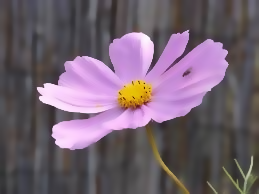

In [10]:
# apply billateral filter
bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75) # 9 is the diametre of the pixel Neighbourhood, first 75 is the sigma color parameter and the other 75 is the sigma space parameter
cv2_imshow(bilateral_filter)

In [11]:
help(cv2.bilateralFilter)

Help on built-in function bilateralFilter:

bilateralFilter(...)
    bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
    .   @brief Applies the bilateral filter to an image.
    .   
    .   The function applies bilateral filtering to the input image, as described in
    .   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
    .   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
    .   very slow compared to most filters.
    .   
    .   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
    .   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
    .   strong effect, making the image look "cartoonish".
    .   
    .   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
    .   applications, and perhaps d=9 for offline applicatio

# Edge detection

## There are two types:
* **Gradient based** - This computes first-order derivations in a digital image to detect edges. This include Sobel opeartor, the Prewitt operator and the Robert operator
* **Gaussian based** - This computes second-order derivations in a digital image to detect edges. This include Canny edge detector and the Laplacian of Gaussian.

### Canny edge detection is a multi-stage algorithm, that inlcude the following steps:
 **1.**Noise reduction Gaussian filter(low-pass filter) <br>
 By example an image will be reduced to a grayscale and a 5x5 Gaussian filter with σ=1.4 has been applied.</br>
**2.**Finding the intensity gradient of the image using L1 and L2 norms.
<br>Tthe resulting image represents the intensity gradient of the previous image. The edges are identical by replicating the areas with significant changes in intensity.
<br>**3.**Apply non-maximum supression(NMS) on the edges </br>. MNS means that the algorithm select the best edges from a set of overlapping edges.
<br>**4.**Apply a double threshold to all the detected edges to eliminate any false positives </br>. Weak pixels are those with the gradient between 0.1 and 0.3. Strong pixels have a gradient value greater than 0.3

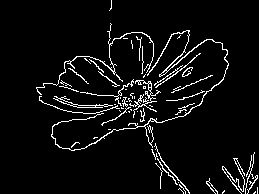

In [12]:
# canny edge detection
edges = cv2.Canny(img, 100, 200) # 100 is the lower threshold any number less that this thres will be supressed to zero, 200 is the upper threshold it means that gradient value above this threshold will be the strong  edges
# 200 strong edges, 100-200 week edges
cv2_imshow(edges)

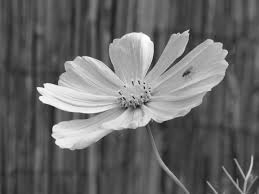

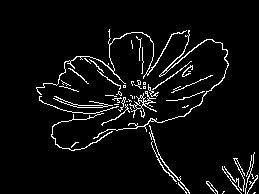

In [13]:
# convert the image into gray image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
edges = cv2.Canny(gray_img, 100, 200)
cv2_imshow(edges)

Comparing the image in gray scale with the color image after we apply the canny filter we can see that there is less noise in the grayscale!!!.

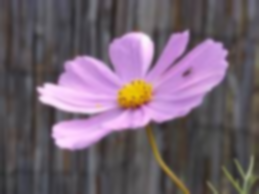

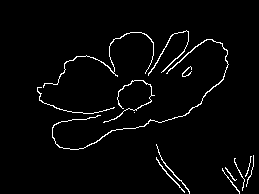

In [14]:
gaussian_filter = cv2.GaussianBlur(img, (15,15), 1.5)
cv2_imshow(gaussian_filter)
edges = cv2.Canny(gaussian_filter, 100, 200)
cv2_imshow(edges)

***Above we have three examples of applying Canny filter in a color image, a gray_scale and a Gaussian filter image.***  

#Drawing Contour

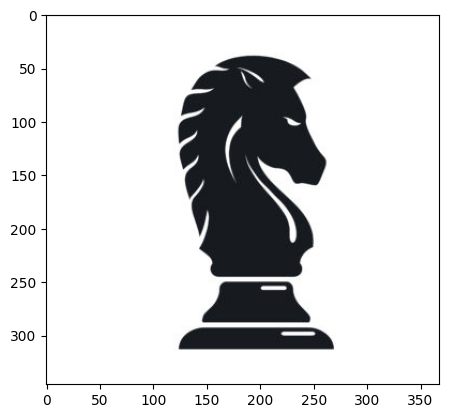

In [15]:
image=cv2.imread('/content/drive/MyDrive/Computer Vision/horse_new.png')
plt.imshow(image)

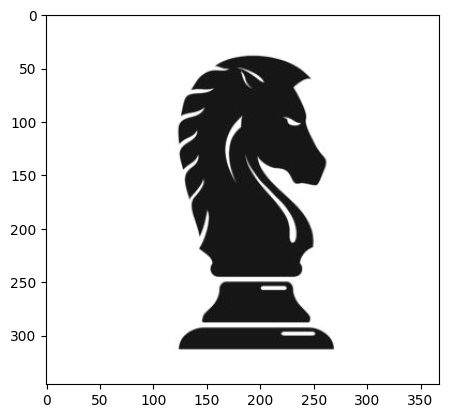

In [16]:
# convert into gray scale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

# extract binary image out of gray scale -
set a threshold 150 value , below this intensity value will become zero,
above 150 - max intensity 255

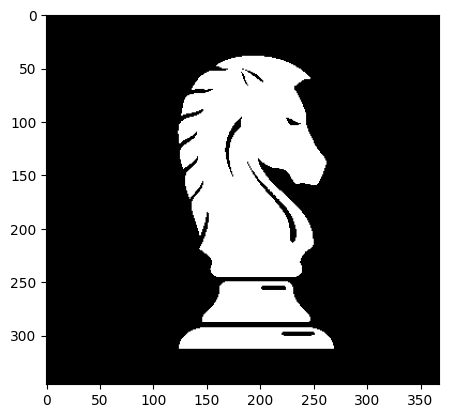

In [17]:
ret,thresh=cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')


# Find the Contours
1. Find the Contours in image
2. Print the numbers
3. Draw contours from image

In [18]:
# find the contours in the image
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

3


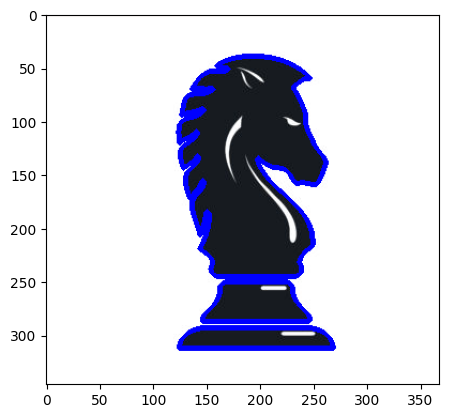

In [19]:
# draw contours
for i in range(len(contours)):
  cv2.drawContours(image,[contours[i]],0,(0,0,255),3)
  plt.imshow(image)

## The utility of contours and projects we can do are:
* Border detection
Segment the element
*Calculate the area, the centroid
* We can do shape analyzis , which shape is this.

A contour is a curve that is joining all the conatiners points along the boundary of the shape. The contour detection is always done in a binary image. The image needs to be first pre-processed like it was done when converting the image to gray scale, then we apply a threshold. After we apply a contour detection method

# <font color="Green">Mini Project</font>

##Lane detection using OpenCv

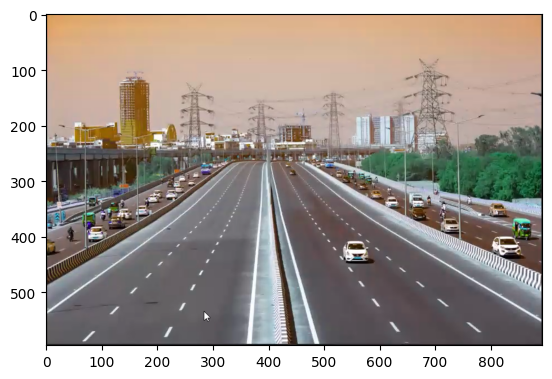

In [20]:
# read the image
highway_img=cv2.imread('/content/drive/MyDrive/Computer Vision/Highway.png')
plt.imshow(highway_img) # using matplotlib is faster then cv2 to display an image

Before doing anything we need to preprocess the image

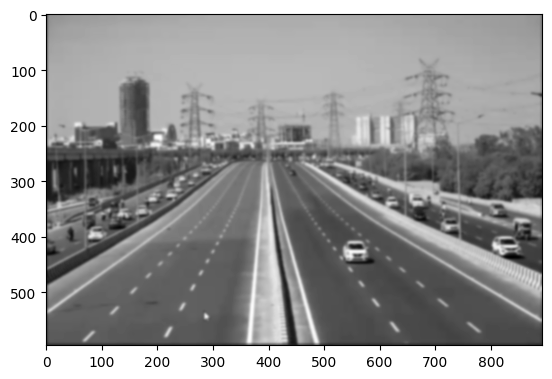

In [21]:
# convert the image into gray scale
gray=cv2.cvtColor(highway_img,cv2.COLOR_BGR2GRAY)
# apply Gaussian filter
gray= cv2.GaussianBlur(gray, (11,11),0) # the gaussian filter is to remove the noise
plt.imshow(gray,cmap='gray')

# detect the edges in the image

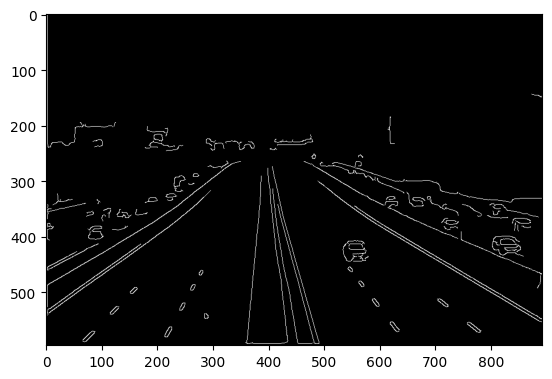

In [22]:
# apply canny adge detection
edges=cv2.Canny(gray,100,200)
plt.imshow(edges,cmap='gray')
plt.show()

# detect lines by applying Hough Transform
<br>-- iterate over each line detected</br>
<br>-- Get the endpoints of the line, filter outlines at the top of image</br>
<br>-- Draw the filtered line one the image</br>
<br>--display the modified image</br>

In [23]:
# apply HoughLines
lines = cv2.HoughLinesP(edges, rho=1,theta= np.pi/180,threshold=100,minLineLength=5,maxLineGap=100)


In [24]:
lines.shape

(19, 1, 4)

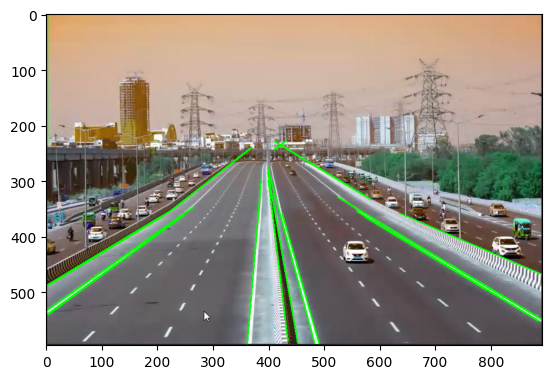

In [25]:
for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(highway_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(highway_img)

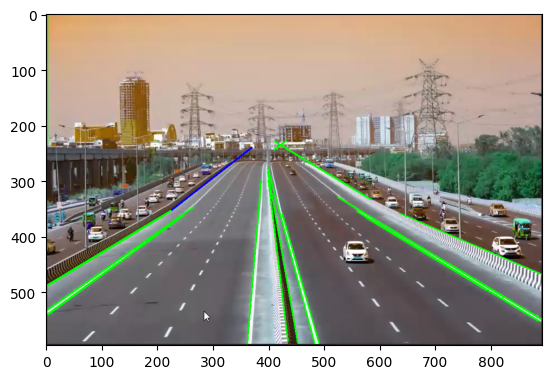

In [26]:
# if we don't want to see every line we can create a filter
for line in lines:
  x1,y1,x2,y2=line[0]
  if (y1>300 and y2<300):
    cv2.line(highway_img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(highway_img)

Try to understand why my output is not the same as in the example, maybe because i'm not using the same image and the code could be slightly different!!!! I'm at the **03:51:07**  . Check the notebook in : <br>C:\Users\guilh\Caltech PostGrad_AI&ML\10_Elective_ADL & Computer Vision\Course_Slides\Jupyter_notebooks\Lesson End Projects\Lesson_02_Image_Formation_and_Processing

# Test with a different image (aditional learning)

check the following github and medium article:

https://github.com/tejakummarikuntla/lane-detection-openCV/blob/master/readme-imgs/test_image.jpg

https://medium.com/analytics-vidhya/road-lane-detection-using-opencv-3e2d2740a4d

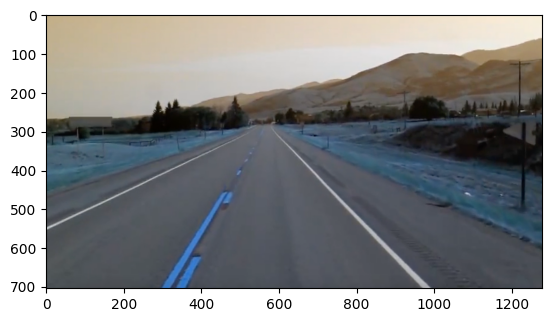

In [27]:
# read the image
test_img=cv2.imread('/content/drive/MyDrive/Computer Vision/test_image.jpg')
plt.imshow(test_img) # using matplotlib is faster then cv2 to display an image

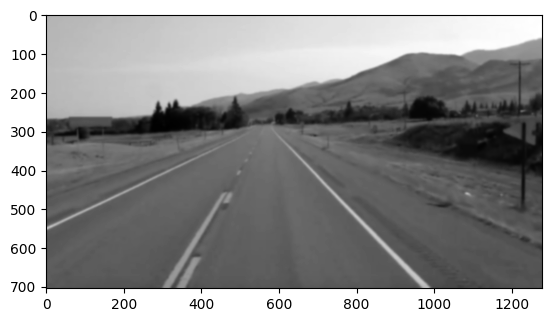

In [28]:
# convert the image into gray scale
gray=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
# apply Gaussian filter
gray= cv2.GaussianBlur(gray, (11,11),0) # the gaussian filter is to remove the noise
plt.imshow(gray,cmap='gray')

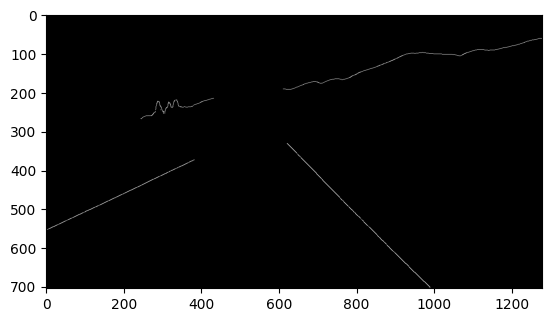

In [29]:
# apply canny adge detection
edges=cv2.Canny(gray,100,200)
plt.imshow(edges,cmap='gray')
plt.show()

In [30]:
# apply HoughLines
lines = cv2.HoughLinesP(edges, rho=1,theta= np.pi/180,threshold=100,minLineLength=5,maxLineGap=100)

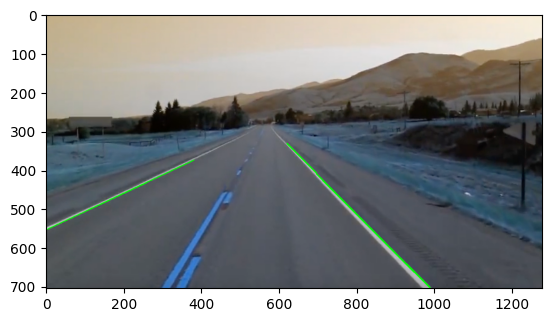

In [31]:
for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(test_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(test_img)

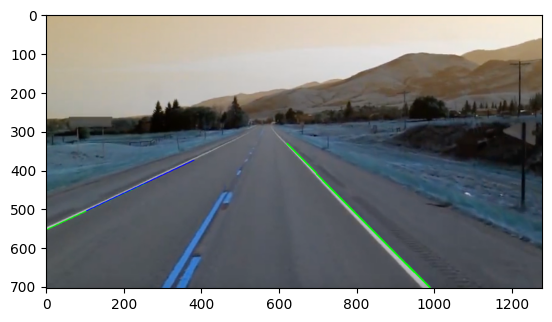

In [32]:
# if we don't want to see every line we can create a filter
for line in lines:
  x1,y1,x2,y2=line[0]
  if (y1>200 and y2<400):
    cv2.line(test_img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(test_img)

# Revisiting Convolution Neural Networks

CNN are used for feature extraction, normaly we are working with high dimensional images (shape =(200,400,3) ) and we can't pass this images to an ANN(Artifical Neural Network) because ANN flattens the data and we would have a very large input. For that reason we use CNN, CNN can do dimensionality reduction. To sum CNN is used due to feature extractiona and dimensionality reduction.

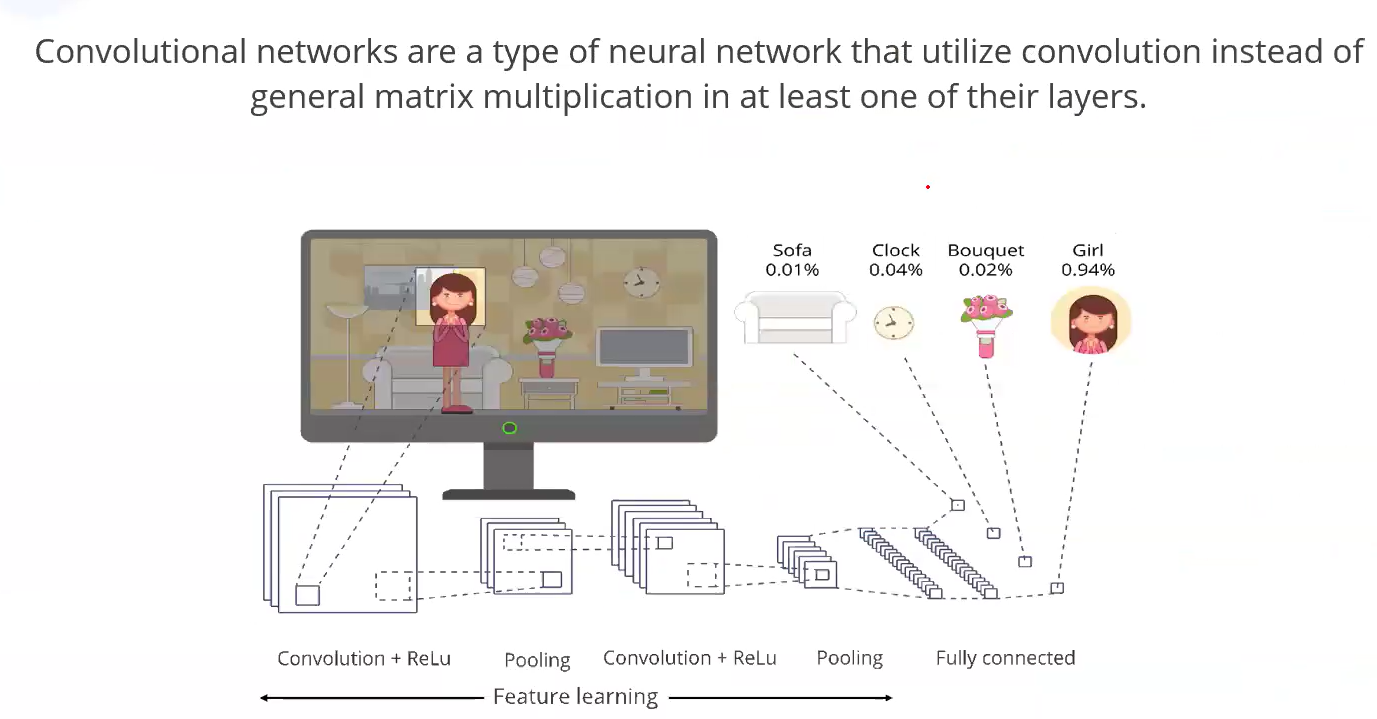

In CNN we are going to learn the features from the image, we want to use it for classification purposes.



**The building blocks of CNN :**
1. Convolution layer + Relu layers
2. Max pooling
3. flatten

Note: We can also use dropout, batch normalization etc...